# Voting

In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import sys
import numpy
numpy.set_printoptions(threshold=sys.maxsize)

f_size = 11
# Importing the dataset
dataset = pd.read_csv('CVDdataset.csv') #11
# dataset = pd.read_csv('CVD dataset-plin-7-9.csv') #14
# dataset = pd.read_csv('CVD-dataset-plin-0-4-6-7-9.csv') #11
print(dataset)
# dataset = pd.read_csv('CVD dataset2.csv')
# dataset = pd.read_csv('CVD-dataset-2-3-11-13-15.csv')
# dataset = pd.read_csv('CVD dataset-plin-4-7-9.csv') #διαβάζω το dataset που δεν περιλαμβανει τα features 7 και 9
# dataset = pd.read_csv('CVD-dataset-1-2-3-5-10-11-12-13-14-15.csv')
data=dataset.iloc[:, :].values
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, f_size].values
# X = dataset.iloc[:, [ 0, 1, 2, 5, 10, 11, 13, 15]].values

rows = len(data)    # 3 rows in your example
cols = len(data[0])
print(rows)
print(cols)

      Age    DD    BMI  Smoking  ypolip  PulsBP  aca0   gla0   chl0    tg0  \
0    71.0  18.0  19.78      1.0     1.0      55   6.6   90.0  153.0   71.0   
1    38.0   2.0  23.31      3.0     1.0      20  10.0  260.0  189.0   79.0   
2    81.0   7.0  29.06      2.0     1.0      65   5.4  140.0  161.0   90.0   
3    50.0  11.0  27.93      3.0     1.0      40   7.1  160.0  204.0   78.0   
4    62.0  25.0  20.70      1.0     1.0      45   4.2  100.0  153.0   51.0   
..    ...   ...    ...      ...     ...     ...   ...    ...    ...    ...   
555  58.0   3.0  24.96      2.0     1.0      60   5.8  140.0  210.0  138.0   
556  77.0  17.0  25.10      1.0     1.0      70   6.9  145.0  202.0   72.0   
557  66.0   0.0  29.21      1.0     2.0      60   6.4  130.0  330.0  282.0   
558  71.0  22.0  31.57      1.0     1.0      80   9.5  145.0  216.0  235.0   
559  56.0   0.0  32.28      1.0     2.0      60   7.1  125.0  156.0   85.0   

     hdl0  CVD prediction  
0    50.0             0.0  
1    47

<class 'pandas.core.frame.DataFrame'>


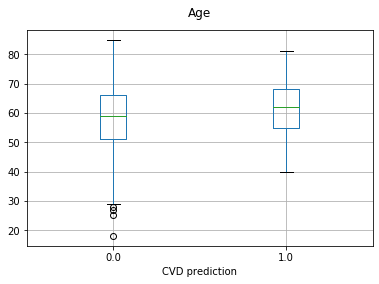

In [2]:
dataset.boxplot(column = 'Age', by = 'CVD prediction');
plt.title('')
plt.suptitle('Age')
print(type(dataset))
# dataset.boxplot(grid=False, rot=60, fontsize=15,figsize=(20,10));

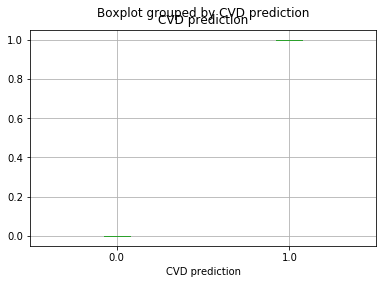

In [3]:
dataset.boxplot(column = 'CVD prediction', by = 'CVD prediction');
# plt.title('')

# dataset.boxplot(grid=False, rot=60, fontsize=15,figsize=(20,10));

In [4]:
dataNoCvd = data[~(data[:,f_size] > 0.0)]
dataCvd = data[~(data[:,f_size] < 1.0)]
rowsNoCvd = len(dataNoCvd)    
rowsCvd = len(dataCvd)
print(rowsNoCvd)
print(rowsCvd)
# print(dataNoCvd)
# print(dataCvd)

519
41


In [5]:
def find_NoCvd_limitsArray(i,DownNoCvd, UpNoCvd, fold_NoCvd_total, fold_NoCvd_residue):
    if i>0 :
        DownNoCvd = UpNoCvd
        UpNoCvd= fold_NoCvd_total+UpNoCvd
    if i < fold_NoCvd_residue :
        UpNoCvd+= 1
#     print("NoCvd limits, Down :",DownNoCvd,"Up ",UpNoCvd)
    return   DownNoCvd, UpNoCvd   
 
def find_Cvd_limitsArray(i,DownCvd, UpCvd, fold_Cvd_total, fold_Cvd_residue,cv):
    if i>0 :
        DownCvd = UpCvd
        UpCvd= fold_Cvd_total+UpCvd
    if i >= cv - fold_Cvd_residue :
         UpCvd+= 1     
#     print("Cvd limits, Down :",DownCvd,"Up ",UpCvd)
    return   DownCvd, UpCvd  

def find_testValSubset(DownNoCvd,UpNoCvd,DownCvd,UpCvd,dataNoCvd,dataCvd):
    temp1=dataNoCvd[DownNoCvd:UpNoCvd,:]
    temp2=dataCvd[DownCvd:UpCvd,:]
    temp3=np.concatenate((temp1, temp2))
#     print(len(temp1),"  ",len(temp2),"  ",len(temp3))
    return temp3

def find_trainSubset(DownNoCvd,UpNoCvd,DownCvd,UpCvd,dataNoCvd,dataCvd):
    temp1 = np.delete(dataNoCvd, slice(DownNoCvd, UpNoCvd), axis=0)
    temp2 = np.delete(dataCvd, slice(DownCvd, UpCvd), axis=0)
    temp3 = np.concatenate((temp1, temp2))
#     print(len(temp1),"  ",len(temp2),"  ",len(temp3))
    return temp1, temp2, temp3

def find_trainSubset1(DownNoCvd,UpNoCvd,DownCvd,UpCvd,dataNoCvd,dataCvd,sur):
    temp1 = np.delete(dataNoCvd, slice(DownNoCvd, UpNoCvd), axis=0)
    temp2 = np.delete(dataCvd, slice(DownCvd, UpCvd), axis=0)
#     print("len 1-2:",len(temp1),len(temp2))
    if sur == False :
        temp3 = np.delete(temp1, slice(0, 46), axis=0)
        temp4 = np.delete(temp2, slice(0, 4), axis=0)
    else:
        temp3 = np.delete(temp1, slice(0, 32), axis=0)
        temp4 = np.delete(temp2, slice(0, 18), axis=0)
        
#     print("len 3-4:",len(temp3),len(temp4))
    temp5 = np.concatenate((temp3, temp4))
#     print(len(temp5))
    return temp3, temp4, temp5

In [6]:
def create_train_test_sets(f_size,cv,dataNoCvd,dataCvd,val_ratio,sur):
    test_total = []
    train_total = []
    train_total_Cvd = []
    train_total_NoCvd = []
    validation_total = []
    rowsNoCvd = len(dataNoCvd)    
    rowsCvd = len(dataCvd)

    fold_Cvd_total = rowsCvd//cv
    fold_Cvd_residue= rowsCvd%cv
    print("fold_Cvd_total  :",fold_Cvd_total," fold_Cvd_residue  :",fold_Cvd_residue)

    fold_NoCvd_total = rowsNoCvd//cv
    fold_NoCvd_residue= rowsNoCvd%cv
    print("fold_NoCvd_total:",fold_NoCvd_total,"fold_NoCvd_residue:",fold_NoCvd_residue)
    
    Cvd_val = round(504*val_ratio*(rowsCvd/len(data)))
    noCvd_val = round(504*val_ratio)-Cvd_val
#     print(noCvd_val)
    
    DownNoCvd=0
    DownCvd=0
    UpNoCvd = fold_NoCvd_total
    UpCvd = fold_Cvd_total

    for i in range(cv):
        X_test = []
        y_test = []
        X_train = []
        y_train = []
        X_val = []
        y_val = []
#         print("============",i,"==============")
        DownNoCvd, UpNoCvd = find_NoCvd_limitsArray(i, DownNoCvd, UpNoCvd, fold_NoCvd_total, fold_NoCvd_residue)
        DownCvd, UpCvd = find_Cvd_limitsArray(i, DownCvd, UpCvd, fold_Cvd_total, fold_Cvd_residue,cv)
#         print(DownNoCvd,UpNoCvd,DownCvd,UpCvd)
        testSubset_total = find_testValSubset(DownNoCvd,UpNoCvd,DownCvd,UpCvd,dataNoCvd,dataCvd)        
        
        if i!=9:
        #όταν δεν είμαστε στο 10ο fold(ξεκινάμε από 0) παίρνουμε τα επόμενα 56 και 4 instaces για το validation set
            validationSubset_total = find_testValSubset(UpNoCvd,UpNoCvd+noCvd_val,UpCvd,UpCvd+Cvd_val,dataNoCvd,dataCvd)
            trainSubset_NoCvd ,trainSubset_Cvd ,trainSubset_total = find_trainSubset(DownNoCvd,UpNoCvd+noCvd_val,DownCvd,UpCvd+Cvd_val,dataNoCvd,dataCvd)
        else:
        #όταν είμαστε στο 10ο fold παίρνουμε τα προηγούμενα 56 και 4 instaces για το validation set
#         DownNoCvd-noCvd_val,DownNoCvd,DownCvd-Cvd_val,DownCvd
            validationSubset_total = find_testValSubset(0,noCvd_val,0,Cvd_val,dataNoCvd,dataCvd)
            print(DownNoCvd,UpNoCvd,DownCvd,UpCvd)
            trainSubset_NoCvd ,trainSubset_Cvd ,trainSubset_total = find_trainSubset1(DownNoCvd,UpNoCvd,DownCvd,UpCvd,dataNoCvd,dataCvd,sur)
    
    #creating X_train, y_train, X_test, y_test
        X_test.append(np.delete(testSubset_total, f_size, axis=1))
        y_test_temp = np.delete(testSubset_total, slice(0, f_size), axis=1)
        y_test.append(np.reshape(y_test_temp, len(y_test_temp)))
        X_test_temp = np.array(X_test)
        X_test = X_test_temp[0]
        y_test_temp = np.array(y_test)
        y_test = y_test_temp[0]
        
        X_val.append(np.delete(validationSubset_total, f_size, axis=1))
        y_val_temp = np.delete(validationSubset_total, slice(0, f_size), axis=1)
        y_val.append(np.reshape(y_val_temp, len(y_val_temp)))
        X_val_temp = np.array(X_val)
        X_val = X_val_temp[0]
        y_val_temp = np.array(y_val)
        y_val = y_val_temp[0]
        
        X_train.append(np.delete(trainSubset_total, f_size, axis=1))
        y_train_temp = np.delete(trainSubset_total, slice(0, f_size), axis=1)
        y_train.append(np.reshape(y_train_temp, len(y_train_temp)))
        X_train_temp = np.array(X_train)
        X_train = X_train_temp[0]
        y_train_temp = np.array(y_train)
        y_train = y_train_temp[0]
        
    #add every subset in a list so we can handle thm later 
        test_total.append([X_test,y_test])
        validation_total.append([X_val,y_val])
        train_total.append([X_train,y_train]) 
        train_total_NoCvd.append(trainSubset_NoCvd)
        train_total_Cvd.append(trainSubset_Cvd)
    return train_total, test_total, validation_total, train_total_NoCvd, train_total_Cvd

In [7]:
train_total, test_total, validation_total, train_total_NoCvd, train_total_Cvd = create_train_test_sets(f_size,10,dataNoCvd,dataCvd,0.1,False)

fold_Cvd_total  : 4  fold_Cvd_residue  : 1
fold_NoCvd_total: 51 fold_NoCvd_residue: 9
468 519 36 41


In [8]:
# Chech ratio in each train and test set
def find_ratio(index_list):
    one = 0
    lenght=len(index_list[0])
    for i in range(lenght):
#         print(index_list[1])
        if index_list[1][i] == 1.0 :
            one+= 1
    ratio = one/lenght
    return ratio

for i in range(10):
    print(len(train_total[i][0]))
    ratio = find_ratio(train_total[i])
    print("ratio in train set:", ratio)
    ratio = find_ratio(test_total[i])
    print("ratio in test set:", ratio)
    ratio = find_ratio(validation_total[i])
    print("ratio in validation set:", ratio)

454
ratio in train set: 0.07268722466960352
ratio in test set: 0.07142857142857142
ratio in validation set: 0.08
454
ratio in train set: 0.07268722466960352
ratio in test set: 0.07142857142857142
ratio in validation set: 0.08
454
ratio in train set: 0.07268722466960352
ratio in test set: 0.07142857142857142
ratio in validation set: 0.08
454
ratio in train set: 0.07268722466960352
ratio in test set: 0.07142857142857142
ratio in validation set: 0.08
454
ratio in train set: 0.07268722466960352
ratio in test set: 0.07142857142857142
ratio in validation set: 0.08
454
ratio in train set: 0.07268722466960352
ratio in test set: 0.07142857142857142
ratio in validation set: 0.08
454
ratio in train set: 0.07268722466960352
ratio in test set: 0.07142857142857142
ratio in validation set: 0.08
454
ratio in train set: 0.07268722466960352
ratio in test set: 0.07142857142857142
ratio in validation set: 0.08
454
ratio in train set: 0.07268722466960352
ratio in test set: 0.07142857142857142
ratio in vali

In [9]:
import matplotlib.pyplot as plt
import shap
from matplotlib import pyplot
from xgboost import plot_importance
import math

def predict_weighted_average(models,X,weights):
#     print("efwef",len(weights), len(models))
    y_pred = []
    y_pred_prob = []
    y_pred_models = []
    y_pred_models1 = []
#     weights = [0.16, 0.175, 0.2, 0.147, 0.148, 0.16]
#     weights = [0.15, 0.4, 0.2, 0.05, 0.05, 0.15]
#   weights = [0.16, 0.173, 0.2, 0.147, 0.16, 0.16]
    models_size = len(models)
#     print(models_size)
    X_size = len(X)
            
    for i in range(models_size):
        y_pred_models.append(models[i].predict(X,output_margin=True))  
        y_pred_models1.append(models[i].predict_proba(X)[:,1])
        
        
    total_shap_values = []
    total_expected_value = 0
    for i in range(models_size):
        explainer = shap.TreeExplainer(models[i])
#         explainer = shap.TreeExplainer(models[i],feature_perturbation="interventional",model_output="probability")
        # calculate shap values. This is what we will plot.
        # Calculate shap_values for all of val_X rather than a single row, to have more data for plot.
         
        pp =models[i].get_booster().get_score(importance_type="cover")
#         print(pp)
        p = fill_importances(pp)
#         print(p)
        for key in p:
            p[key] = p[key]*weights[i]*0.1
            
        if(i==0):
             importances = p.copy()
        else:
            for key in importances:
                importances[key] += p[key]
   
            
        shap_values = explainer.shap_values(X)
        shap_values_auc = [[l*weights[i] for l in k] for k in shap_values]
        
        if(i==0):
             total_shap_values = shap_values_auc.copy()
        else:
            for a in range(len(total_shap_values)):
                for b in range(len(total_shap_values[0])):
                     total_shap_values[a][b] += shap_values_auc[a][b]
        total_expected_value += explainer.expected_value*weights[i] 
#         print("explainer.expected_value",explainer.expected_value)
  
    feature_names = ['Age','DD','BMI','Smoking','ypolip','PulsBP','aca0','gla0','chl0','tg0','hdl0']
    
    
 
    t_shap_values = numpy.array(total_shap_values)
    
#     shap.summary_plot(t_shap_values, X,feature_names)  
    
####################
#     shap.force_plot(total_expected_value, t_shap_values[1,:], X[1],feature_names,matplotlib=True,link='logit')

#             ,link='logit'
            
            
        
    for j in range(X_size):
        sum = 0
        sum1 = 0
        for i in range(models_size):
            sum = sum + y_pred_models[i][j]*weights[i]
            sum1 = sum1 + y_pred_models1[i][j]*weights[i]
        avr = sum
#         /models_size
        pred_prob = math.exp(avr)/(1 + math.exp(avr))
        y_pred_prob.append(pred_prob)
        
        if avr>= 0 :
            y_pred.append(1.)
            if(j==1):
                print("prediction YES")
                print(avr)
                print(pred_prob)
#                 print(sum1)
        else:
            y_pred.append(0.)
            if(j==1):
                print("prediction NO")
                print(avr)
                print(pred_prob)
#                 print(sum1)
    return y_pred,t_shap_values,importances,y_pred_prob

In [10]:
def fill_importances(p):
        if p.get("f0")== None:
            p['f0'] = 0
        if p.get("f1")== None:
            p['f1'] = 0
        if p.get("f2")== None:
            p['f2'] = 0
        if p.get("f3")== None:
            p['f3'] = 0
        if p.get("f4")== None:
            p['f4'] = 0
        if p.get("f5")== None:
            p['f5'] = 0
        if p.get("f6")== None:
            p['f6'] = 0
        if p.get("f7")== None:
            p['f7'] = 0
        if p.get("f8")== None:
            p['f8'] = 0
        if p.get("f9")== None:
            p['f9'] = 0
        if p.get("f10")== None:
            p['f10'] = 0
        return p

In [11]:
from xgboost import XGBClassifier


def my_fit(ratio,dataNoCvd,dataCvd, validation_total, params):   
    Subarray=[]
    models = []
    # yarray
    
    rowsNoCvd = len(dataNoCvd)    
    rowsCvd = len(dataCvd)
#     print("Size of NoCvd cases in train set:",rowsNoCvd)
#     print("Size of Cvd cases in train set  :",rowsCvd)
#     print("validation_total",len(validation_total[0][0]))


    numOfSubsamples = rowsNoCvd//(rowsCvd*ratio)
    numOfSubsamples= int(numOfSubsamples)
    SubNoCvd = rowsNoCvd//numOfSubsamples
    residue = rowsNoCvd- SubNoCvd*numOfSubsamples


    Up = 0
    
    for i in range(numOfSubsamples):
        
        classifier = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=params[5],
                  colsample_bynode=1, colsample_bytree=params[8], gamma=params[4],
                  learning_rate=params[0], max_delta_step=0, max_depth=params[1],
                  min_child_weight=params[3], missing=None, n_estimators=params[2], n_jobs=1,
                  nthread=None, objective='binary:logistic', random_state=0,
                  reg_alpha=params[9], reg_lambda=params[6], scale_pos_weight=params[7], seed=None,
                  silent=None, subsample=params[10], verbosity=1)
    #     print(i)
    #Creating the training set for each model
        Down = Up
        Up= Up + SubNoCvd
        if i < residue :
            Up+= 1
        
#         print(Down)
#         print(Up)
        
        Sub1=dataNoCvd[Down:Up,:]
        Sub2=np.concatenate((Sub1, dataCvd))
        Subarray.append(Sub2)
        
    #Dividing to X and y of the previous traing set    
        X=np.delete(Subarray[i], f_size, axis=1)
        y=np.delete(Subarray[i], slice(0, f_size), axis=1)
        y=np.reshape(y, len(y))
        
        X_val = validation_total[i][0]
        y_val = validation_total[i][1]
#         print(len(X),len(X_val))
        eval_set  = [(X,y), (X_val,y_val)]
        
        classifier.fit( X, y, eval_set=eval_set, eval_metric="auc", early_stopping_rounds=50,verbose = False)
#         classifier.fit( X, y)

        
        models.append(classifier)

        
    return models 

In [12]:
# https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6

from sklearn.metrics import  confusion_matrix,roc_curve, roc_auc_score, accuracy_score
from imxgboost.imbalance_xgb import imbalance_xgboost as imb_xgb
from sklearn.model_selection import StratifiedKFold # import KFold
from sklearn import metrics
from sklearn.metrics import brier_score_loss

def my_cross_val( cv, train_total, test_total, train_total_NoCvd, train_total_Cvd,params, weights):
    accuracy = []
    specificity = []
    sensitivity = []
    auc = []
    brier_score = []
    cv_total_shap_values = []
    X_total = []
    y_pred_total = []
    
    # print(X)
    for i in range(cv):
#         X_train = train_total[i][0]
#         y_train = train_total[i][1]
        X_test = test_total[i][0]
        y_test = test_total[i][1]
        


        models = my_fit( 2, train_total_NoCvd[i], train_total_Cvd[i], validation_total,params)
    
        
        
        
        y_pred,shap_values,importances,y_pred_prob = predict_weighted_average(models,X_test,weights)
        
#         print(len(shap_values[0]))
#         print(len(shap_values))
        
        
        if(i==0):
             cv_total_importances = importances.copy()
        else:
            for key in cv_total_importances:
                cv_total_importances[key] += importances[key]

        
        
        if(i==0):
            #combine all shapley values in one array
            X_total = X_test.copy()
            cv_total_shap_values = shap_values.copy() 
            
            #combine all y_pred in one array
            y_pred_total = y_pred.copy()
            
        else:
            #combine all shapley values in one array
            X_total = np.concatenate((X_total, X_test), axis=0)
#             print("lala",len(cv_total_shap_values))
#             print(cv_total_shap_values)
#             print(shap_values)
#             print(cv_total_shap_values)
            cv_total_shap_values = np.concatenate((cv_total_shap_values, shap_values), axis=0)
            
            #combine all y_pred in one array
            y_pred_total = np.concatenate((y_pred_total, y_pred), axis=0)
            
                        
       
                        
        cm = confusion_matrix(y_test, y_pred)
    #     print(cm)

        total1=sum(sum(cm))
        #####from confusion matrix calculate accuracy
        accuracy1=(cm[0,0]+cm[1,1])/total1
    #   print ('Accuracy : ', accuracy1)

        specificity1 = cm[0,0]/(cm[0,0]+cm[0,1])
    #   print('Specificity : ', specificity1 )

        sensitivity1 = cm[1,1]/(cm[1,0]+cm[1,1])
    #   print('Sensitivity : ', sensitivity1)
        brier_score_loss1 = brier_score_loss(y_test, y_pred_prob)
#         y = np.array(y_test)
#         pred = np.array(y_pred)
#         fpr, tpr, thresholds = metrics.roc_curve(y, pred, pos_label=2)
#         auc1 = metrics.auc(fpr, tpr)
        
        auc1 = roc_auc_score(y_test, y_pred)

    
        accuracy.append(accuracy1)
        specificity.append(specificity1)
        sensitivity.append(sensitivity1) 
        auc.append(auc1)
        brier_score.append(brier_score_loss1)
     
    feature_names = ['Age','DD','BMI','Smoking','ypolip','PulsBP','aca0','gla0','chl0','tg0','hdl0']
    
#     print("total shap",len(cv_total_shap_values[0]))
#     print("total shap",len(cv_total_shap_values))
#     print("total shap",len(X_total[0]))
#     print("total shap",len(X_total))
    
    cv_total_importances['Age'] = cv_total_importances.pop('f0')
    cv_total_importances['DD'] = cv_total_importances.pop('f1')
    cv_total_importances['BMI'] = cv_total_importances.pop('f2')
    cv_total_importances['Smoking'] = cv_total_importances.pop('f3')
    cv_total_importances['ypolip'] = cv_total_importances.pop('f4')
    cv_total_importances['PulsBP'] = cv_total_importances.pop('f5')
    cv_total_importances['aca0'] = cv_total_importances.pop('f6')
    cv_total_importances['gla0'] = cv_total_importances.pop('f7')
    cv_total_importances['chl0'] = cv_total_importances.pop('f8')
    cv_total_importances['tg0'] = cv_total_importances.pop('f9')
    cv_total_importances['hdl0'] = cv_total_importances.pop('f10')
    
    plot_importance(cv_total_importances,importance_type='cover',max_num_features=None)
    
#     shap.summary_plot(cv_total_shap_values, X_total,feature_names)
    
    return accuracy, specificity, sensitivity, auc, brier_score, y_pred_total, X_total

In [13]:
a=np.array([[1,1],[2,2]])
b=np.array([[3,3],[4,4]])

for i in range(10):
    a = [[i,i]]
    b = np.concatenate((b, a), axis=0)
#     b += a
print((b))

[[3 3]
 [4 4]
 [0 0]
 [1 1]
 [2 2]
 [3 3]
 [4 4]
 [5 5]
 [6 6]
 [7 7]
 [8 8]
 [9 9]]


In [14]:
# https://www.geeksforgeeks.org/python-all-possible-permutations-of-n-lists/

def compute_comb(params):
    
    # initializing lists 
    list1 = params.get("learning_rate")
    list2 = params.get("max_depth")
    list3 = params.get("n_estimators") 
    list4 = params.get("min_child_weight")
    list5 = params.get("gamma")    
    list6 = params.get("colsample_bylevel")
    list7 = params.get("reg_lambda") 
    list8 = params.get("scale_pos_weight")
    list9 = params.get("colsample_bytree")
    list10 = params.get("reg_alpha")
    list11 = params.get("subsample")
    

#     # printing lists  
#     print ("The original lists are : " + str(list1) +
#                                    " " + str(list2) + 
#                                    " " + str(list3) + 
#                                    " " + str(list4) + 
#                                    " " + str(list5) + 
#                                    " " + str(list6) +
#                                    " " + str(list7) +
#                                    " " + str(list8)) 

    # using list comprehension  
    # to compute all possible permutations 
    res = [[i, j, k, l, m, n, o, p,q,r,s] for i in list1  
                                          for j in list2 
                                          for k in list3 
                                          for l in list4 
                                          for m in list5 
                                          for n in list6 
                                          for o in list7
                                          for p in list8
                                          for q in list9
                                          for r in list10
                                          for s in list11] 

    # printing result 
#     print ("All possible permutations are : " +  str(res))
    return res

In [15]:
class style:
    BOLD = '\033[1m'
    END = '\033[0m'

In [20]:
# https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6

from sklearn.metrics import  confusion_matrix,roc_curve, roc_auc_score, accuracy_score
from imxgboost.imbalance_xgb import imbalance_xgboost as imb_xgb
from sklearn.model_selection import StratifiedKFold # import KFold
from statistics import mean
import matplotlib.pyplot as plt 

train_total_sur =[] 
test_total_sur=[] 
validation_total_sur=[]
train_total_NoCvd_sur=[] 
train_total_Cvd_sur=[]
def gridsearch(params,weights):
    max_sens = 0
    max_spes = 0
    max_acc = 0
    best_params = []
    max_params = []
    max_params1 = []
    max_auc = 0
    max_acc1 = 0
    combs = compute_comb(params)
#     print(len(combs))
    for j in range(len(combs)):
#         print(j)
        accuracy, specificity, sensitivity, auc, brier_score, y_pred_total, X_total = my_cross_val( 10, train_total, test_total, train_total_NoCvd, train_total_Cvd,combs[j],weights)
        # Create a figure instance
        fig = plt.figure(1, figsize=(30, 25))

        # Create an axes instance
        ax = fig.add_subplot(111)

        # Create the boxplot
        bp = ax.boxplot(y_pred_total)

        # Save the figure
        fig.savefig('fig1.png', bbox_inches='tight')
        
        if mean(auc)>0.69:
            print(style.BOLD + "----------------------------------------------------------------"+ style.END)
            print(combs[j])
            print (style.BOLD + 'accuracy    ' + style.END, mean(accuracy))
            print (style.BOLD + 'specificity ' + style.END, mean(specificity))
            print (style.BOLD + 'sensitivity ' + style.END, mean(sensitivity))
            print (style.BOLD + 'auc         ' + style.END, mean(auc))
            print (style.BOLD + 'brier_score ' + style.END, mean(brier_score))
            print (style.BOLD + 'weights     ' + style.END, weights)
            print(style.BOLD + "----------------------------------------------------------------"+ style.END)
#         else:
#             print(combs[j])
#             print("accuracy    ",mean(accuracy))
#             print("specificity ",mean(specificity))
#             print("sensitivity ",mean(sensitivity))
#             print("auc         ",mean(auc))
#             print("weights     ",weights)
            
        best_params.append([combs[j],mean(accuracy),mean(specificity),mean(sensitivity),mean(auc), mean(brier_score), weights])
        if mean(auc)> max_auc:
            max_sens = mean(sensitivity)
            max_spes = mean(specificity)
            max_acc = mean(accuracy)
            max_auc = mean(auc)
            max_params = combs[j]
            
        #=========================== Surrogate section ==============================    
        zero = 0
        one = 0
        dataNoCvd_surrog = []
        dataCvd_surrog = []
        dataNoCvd_surrog_temp = []
        dataCvd_surrog_temp = []
        dataa = X_total.copy()
        print(type(X_total))
        for i in range(len(y_pred_total)):
#             np.concatenate(X_total[i], y_pred_total[i])
#             X_total[i].append(y_pred_total[i])
            if y_pred_total[i] == 0:
                zero += 1
                temp1 = np.append(X_total[i],y_pred_total[i])
                dataNoCvd_surrog_temp.append(temp1)
            else:
                one += 1
                temp2 = np.append(X_total[i],y_pred_total[i])
                dataCvd_surrog_temp.append(temp2)
        print("Ones  :",one," percentage",one/len(y_pred_total))
        print("Zeros :",zero," percentage",zero/len(y_pred_total))
#         print(dataNoCvd_surrog)
        dataNoCvd_surrog = np.array(dataNoCvd_surrog_temp)
        dataCvd_surrog = np.array(dataCvd_surrog_temp)
        print(len(dataNoCvd_surrog))
        print(len(dataCvd_surrog))
        
        train_total_sur, test_total_sur, validation_total_sur, train_total_NoCvd_sur, train_total_Cvd_sur = create_train_test_sets(f_size,10,dataNoCvd_surrog,dataCvd_surrog,0.1,True)
       
        for i in range(10):
#             print(len(train_total_NoCvd_sur[i][0]))
            zeroos = 0
            onees = 0
            zeroos1 = 0
            onees1 = 0
            zeroos2 = 0
            onees2 = 0
#             print(train_total_sur[i])
#             print(test_total_sur[i])
#             print(validation_total_sur[i])
            for k in range(len(train_total_sur[i][1])):
                if train_total_sur[i][1][k] == 0:
                    zeroos += 1
                else:
                    onees += 1
            for kk in range(len(test_total_sur[i][1])):        
                if test_total_sur[i][1][kk] == 0:
                    zeroos1 += 1
                else:
                    onees1 += 1
                    
            for kkk in range(len(validation_total_sur[i][1])):      
                if validation_total_sur[i][1][kkk] == 0:
                    zeroos2 += 1
                else:
                    onees2 += 1
                    
            print("Ones  train:",onees," percentage",onees/len(train_total_sur[i][1]))
            print("Zeros train:",zeroos," percentage",zeroos/len(train_total_sur[i][1]))
            print("Ones  test:",onees1," percentage",onees1/len(test_total_sur[i][1]))
            print("Zeros test:",zeroos1," percentage",zeroos1/len(test_total_sur[i][1]))
            print("Ones  valid:",onees2," percentage",onees2/len(validation_total_sur[i][1]))
            print("Zeros valid:",zeroos2," percentage",zeroos2/len(validation_total_sur[i][1]))
            
#             print((train_total_sur[i][1]))
            ratio_sur = find_ratio(train_total_sur[i])
            print("ratio_sur in train set:", ratio_sur)
            ratio_sur = find_ratio(test_total_sur[i])
            print("ratio_sur in test set:", ratio_sur)
            ratio_sur = find_ratio(validation_total_sur[i])
            print("ratio_sur in validation set:", ratio_sur)
            print(" ")
         
        
        params1 = {
                    "learning_rate"    :[0.1],  #0.01-0.2 Makes the model more robust by shrinking the weights on each step
                    "max_depth"        :[2],  #3-10 control over-fitting as higher depth will allow model to learn relations very specific to a particular sample
                    "n_estimators"     :[1000],
                    "min_child_weight" :[3],         #0.5-1 small values might lead to under-fitting
                    "gamma"            :[0],            #Makes the algorithm conservative --> No overfitting
                    "colsample_bylevel" :[0.85], #0.5-1
                     "reg_lambda"      :[1], #  it should be explored to reduce overfitting.
                    "scale_pos_weight" :[1],
                    "colsample_bytree" :[1.0],
                    "reg_alpha"        :[0.1],
                    "subsample"        :[0.9]
    
        }
        combs1 = compute_comb(params1)
        print(len(combs1))
        for m in range(len(combs1)):
            print (m,"/",len(combs1), end="\r")  
            accuracy, specificity, sensitivity, auc = my_cross_val_sur( 10, train_total_sur, test_total_sur, train_total_NoCvd_sur, train_total_Cvd_sur, validation_total_sur,combs1[m])
            if mean(accuracy)>0.5:
                print(style.BOLD + "----------------------------------------------------------------"+ style.END)
                print(combs1[m])
                print (style.BOLD + 'accuracy    ' + style.END, mean(accuracy))
                print (style.BOLD + 'specificity ' + style.END, mean(specificity))
                print (style.BOLD + 'sensitivity ' + style.END, mean(sensitivity))
                print (style.BOLD + 'auc         ' + style.END, mean(auc))
    #             print (style.BOLD + 'brier_score ' + style.END, mean(brier_score))
                print(style.BOLD + "----------------------------------------------------------------"+ style.END)
            if mean(accuracy)> max_acc1:
                max_sens1 = mean(sensitivity)
                max_spes1 = mean(specificity)
                max_acc1 = mean(accuracy)
                max_auc1 = mean(auc)
                max_params1 = combs1[m]
    return max_sens, max_params, max_spes, max_acc, max_auc, best_params, max_sens1, max_params1, max_spes1, max_acc1, max_auc1

In [54]:
from sklearn.metrics import  confusion_matrix,roc_curve, roc_auc_score, accuracy_score
from imxgboost.imbalance_xgb import imbalance_xgboost as imb_xgb
from sklearn.model_selection import StratifiedKFold # import KFold
from sklearn import metrics
from sklearn.metrics import brier_score_loss
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE

def my_cross_val_sur( cv, train_total, test_total, train_total_NoCvd, train_total_Cvd, validation_total,params):
    accuracy = []
    specificity = []
    sensitivity = []
    auc = []
    brier_score = []
    cv_total_shap_values = []
    X_total = []
    y_pred_total = []
    
    # print(X)
    for i in range(cv):
        X = train_total[i][0]
        y = train_total[i][1]
        X_test = test_total[i][0]
        y_test = test_total[i][1]
        
        X_val = validation_total[i][0]
        y_val = validation_total[i][1]

#         stop_early(RandomForestClassifier(n_estimators=400, max_depth=2),n_min_iterations=100,X_train, y_train,X_test, y_test)
#         plt.grid()
#         clf = RandomForestClassifier(max_depth=150, random_state=0, min_samples_split=3, min_samples_leaf=2)
#         clf.fit(X_train, y_train)

#         y_pred = clf.predict(X_test)   
#         classifier = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=params[5],
#                   colsample_bynode=1, colsample_bytree=params[8], gamma=params[4],
#                   learning_rate=params[0], max_delta_step=0, max_depth=params[1],
#                   min_child_weight=params[3], missing=None, n_estimators=params[2], n_jobs=1,
#                   nthread=None, objective='binary:logistic', random_state=0,
#                   reg_alpha=params[9], reg_lambda=params[6], scale_pos_weight=params[7], seed=None,
#                   silent=None, subsample=params[10], verbosity=1)
        classifier = XGBClassifier(n_estimators=1000)
        
        
        sm = SMOTE(random_state=42,sampling_strategy=0.85)
        X, y = sm.fit_resample(X, y)
        print("SMOTE", len(X))
        eval_set  = [(X,y), (X_val,y_val)]
        classifier.fit( X, y, eval_set=eval_set, eval_metric="rmse", early_stopping_rounds=50,verbose = False)
#         classifier.fit( X, y)
                        
        y_pred = classifier.predict(X_test)  
                        
        cm = confusion_matrix(y_test, y_pred)
    #     print(cm)

        total1=sum(sum(cm))
        #####from confusion matrix calculate accuracy
        accuracy1=(cm[0,0]+cm[1,1])/total1
    #   print ('Accuracy : ', accuracy1)

        specificity1 = cm[0,0]/(cm[0,0]+cm[0,1])
    #   print('Specificity : ', specificity1 )

        sensitivity1 = cm[1,1]/(cm[1,0]+cm[1,1])
    #   print('Sensitivity : ', sensitivity1)
    
#         brier_score_loss1 = brier_score_loss(y_test, y_pred_prob)

#         y = np.array(y_test)
#         pred = np.array(y_pred)
#         fpr, tpr, thresholds = metrics.roc_curve(y, pred, pos_label=2)
#         auc1 = metrics.auc(fpr, tpr)
        
        auc1 = roc_auc_score(y_test, y_pred)

    
        accuracy.append(accuracy1)
        specificity.append(specificity1)
        sensitivity.append(sensitivity1) 
        auc.append(auc1)
#         brier_score.append(brier_score_loss1)
     
    
    return accuracy, specificity, sensitivity, auc

# Ratio = 2

 Αποτέλεσμα της gridsearch με τις ακόλουθες παραμέτρους, γίνονται print όλα και αυτά που ικανοποιούν την συνθήκη : if mean(sensitivity)> 0.5 and mean(specificity)>0.6 and mean(accuracy)>0.6 and mean(auc)>0.5 είναι με bold και μεταξύ γραμμών.

In [55]:
#σωστό
params = {
                    "learning_rate"    :[0.5],  #0.01-0.2 Makes the model more robust by shrinking the weights on each step
                    "max_depth"        :[2],  #3-10 control over-fitting as higher depth will allow model to learn relations very specific to a particular sample
                    "n_estimators"     :[1000],
                    "min_child_weight" :[3],         #0.5-1 small values might lead to under-fitting
                    "gamma"            :[0.5],            #Makes the algorithm conservative --> No overfitting
                    "colsample_bylevel" :[0.5], #0.5-1
                     "reg_lambda"      :[1], #  it should be explored to reduce overfitting.
                    "scale_pos_weight" :[3],
                    "colsample_bytree" :[0.75],
                    "reg_alpha"        :[0],
                    "subsample"        :[1.0]
    
        }
# [0.5, 2, 1000, 3, 0.5, 0.6, 1, 3, 0.8, 0, 1.0]
# accuracy     0.6875
# specificity  0.6802790346907994
# sensitivity  0.785
# auc          0.7326395173453997
# weights      [0.2, 0.05, 0.33, 0.13, 0.15, 0.14]

Setting feature_perturbation = "tree_path_dependent" because no background data was given.


prediction NO
-2.923182404041291
0.05101939996311265


Setting feature_perturbation = "tree_path_dependent" because no background data was given.


prediction YES
1.4586848962306975
0.811331450681675


Setting feature_perturbation = "tree_path_dependent" because no background data was given.


prediction NO
-0.13814584955573084
0.4655183582731507


Setting feature_perturbation = "tree_path_dependent" because no background data was given.


prediction YES
0.6577897852659225
0.6587637197449654


Setting feature_perturbation = "tree_path_dependent" because no background data was given.


prediction YES
0.781019975244999
0.6858999003119756


Setting feature_perturbation = "tree_path_dependent" because no background data was given.


prediction NO
-0.6524597632139921
0.342435449580547


Setting feature_perturbation = "tree_path_dependent" because no background data was given.


prediction NO
-0.6878887769579887
0.33450288977213605


Setting feature_perturbation = "tree_path_dependent" because no background data was given.


prediction YES
1.5945673033595085
0.8312577206694359


Setting feature_perturbation = "tree_path_dependent" because no background data was given.


prediction NO
-2.4769172790646556
0.07749229050035296


Setting feature_perturbation = "tree_path_dependent" because no background data was given.


prediction YES
0.1295805084705353
0.5323498739275869
----------------------------------------------------------------
[0.5, 2, 1000, 3, 0.5, 0.5, 1, 3, 0.75, 0, 1.0]
accuracy     0.6875
specificity  0.6802790346907994
sensitivity  0.785
auc          0.7326395173453997
brier_score  0.2233623734325444
weights      [0.2, 0.05, 0.33, 0.13, 0.15, 0.14]
----------------------------------------------------------------
<class 'numpy.ndarray'>
Ones  : 198  percentage 0.3535714285714286
Zeros : 362  percentage 0.6464285714285715
362
198
fold_Cvd_total  : 19  fold_Cvd_residue  : 8
fold_NoCvd_total: 36 fold_NoCvd_residue: 2
326 362 178 198
Ones  train: 161  percentage 0.35462555066079293
Zeros train: 293  percentage 0.6453744493392071
Ones  test: 19  percentage 0.3392857142857143
Zeros test: 37  percentage 0.6607142857142857
Ones  valid: 18  percentage 0.36
Zeros valid: 32  percentage 0.64
ratio_sur in train set: 0.35462555066079293
ratio_sur in test set: 0.3392857142857143
ratio_sur in validation

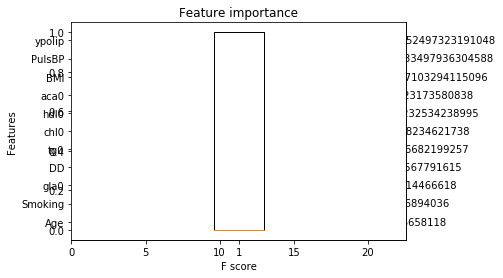

In [56]:

weights = [0.2, 0.05, 0.33, 0.13, 0.15, 0.14]

max_sens ,max_params, max_spes, max_acc, max_auc, best_params, max_sens1, max_params1, max_spes1, max_acc1, max_auc1 = gridsearch(params,weights)

# parameters : [0.5, 2, 1000, 3, 0.5, 0.5, 1, 3, 0.75, 0, 1.0]
# accuracy : 0.6928571428571428
# spes     : 0.6860859728506787
# sens     : 0.785
# auc      : 0.7355429864253394
# weights  : [0.2, 0.1, 0.35, 0.1, 0.15, 0.1]

In [ ]:
[0.1, 2, 1000, 4, 0, 0.5, 1.5, 1, 1.0, 0.1, 0.8]
accuracy     0.8107142857142857
specificity  0.903078078078078
sensitivity  0.6410526315789473
auc          0.7720653548285127

[0.1, 4, 1000, 4, 1, 0.5, 1, 1, 0.5, 0.2, 1.0]
accuracy     0.8107142857142857
specificity  0.8948198198198198
sensitivity  0.6560526315789473
auc          0.7754362256993836

In [ ]:

weights = [0.2, 0.05, 0.33, 0.13, 0.15, 0.14]

max_sens ,max_params, max_spes, max_acc, max_auc, best_params, max_sens1, max_params1, max_spes1, max_acc1, max_auc1 = gridsearch(params,weights)

# parameters : [0.5, 2, 1000, 3, 0.5, 0.5, 1, 3, 0.75, 0, 1.0]
# accuracy : 0.6928571428571428
# spes     : 0.6860859728506787
# sens     : 0.785
# auc      : 0.7355429864253394
# weights  : [0.2, 0.1, 0.35, 0.1, 0.15, 0.1]

Setting feature_perturbation = "tree_path_dependent" because no background data was given.


prediction NO
-2.923182404041291
0.05101939996311265


Setting feature_perturbation = "tree_path_dependent" because no background data was given.


prediction YES
1.4586848962306975
0.811331450681675


Setting feature_perturbation = "tree_path_dependent" because no background data was given.


prediction NO
-0.13814584955573084
0.4655183582731507


Setting feature_perturbation = "tree_path_dependent" because no background data was given.


prediction YES
0.6577897852659225
0.6587637197449654


Setting feature_perturbation = "tree_path_dependent" because no background data was given.


prediction YES
0.781019975244999
0.6858999003119756


Setting feature_perturbation = "tree_path_dependent" because no background data was given.


prediction NO
-0.6524597632139921
0.342435449580547


Setting feature_perturbation = "tree_path_dependent" because no background data was given.


prediction NO
-0.6878887769579887
0.33450288977213605


Setting feature_perturbation = "tree_path_dependent" because no background data was given.


prediction YES
1.5945673033595085
0.8312577206694359


Setting feature_perturbation = "tree_path_dependent" because no background data was given.


prediction NO
-2.4769172790646556
0.07749229050035296


Setting feature_perturbation = "tree_path_dependent" because no background data was given.


prediction YES
0.1295805084705353
0.5323498739275869
----------------------------------------------------------------
[0.5, 2, 1000, 3, 0.5, 0.5, 1, 3, 0.75, 0, 1.0]
accuracy     0.6875
specificity  0.6802790346907994
sensitivity  0.785
auc          0.7326395173453997
brier_score  0.2233623734325444
weights      [0.2, 0.05, 0.33, 0.13, 0.15, 0.14]
----------------------------------------------------------------
<class 'numpy.ndarray'>
Ones  : 198  percentage 0.3535714285714286
Zeros : 362  percentage 0.6464285714285715
362
198
fold_Cvd_total  : 19  fold_Cvd_residue  : 8
fold_NoCvd_total: 36 fold_NoCvd_residue: 2
326 362 178 198
Ones  train: 161  percentage 0.35462555066079293
Zeros train: 293  percentage 0.6453744493392071
ratio_sur in train set: 0.35462555066079293
ratio_sur in test set: 0.3392857142857143
ratio_sur in validation set: 0.36
 
Ones  train: 161  percentage 0.35462555066079293
Zeros train: 293  percentage 0.6453744493392071
ratio_sur in train set: 0.35462555066079293
rati

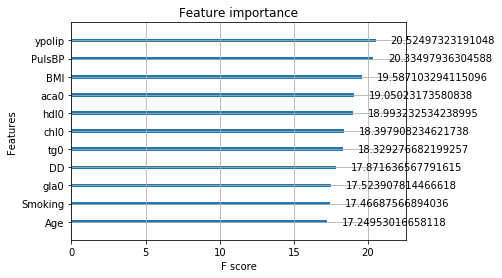

In [205]:

weights = [0.2, 0.05, 0.33, 0.13, 0.15, 0.14]

max_sens ,max_params, max_spes, max_acc, max_auc, best_params = gridsearch(params,weights)